In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2
df['Region']=df['Region'].astype('int')

#### The dataset is converted into a two set based on the region from 122th index:
1. For the Bejaia Region Dataset 
2. For the Sidi-Bel Abbes Region Dataset

In [6]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


## Feature Engineering

In [7]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [10]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [11]:
#Removing spaces from the coumn names
df.columns=df.columns.str.strip()

In [12]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [13]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
Classes            1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [14]:
#Strippping values in classes column
df['Classes']=df.Classes.str.strip()

In [15]:
df['Classes'].value_counts()

fire        137
not fire    106
Classes       1
Name: Classes, dtype: int64

In [16]:
df=df[df['Classes']!='Classes']

In [17]:
df['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 29.4+ KB


In [19]:
for i in df.columns:
    if df[i].dtype=='O'and i!='Classes':
        df[i]=df[i].astype(float)

In [20]:
df[['day','month','year']]=df[['day','month','year']].astype(int)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    float64
 4   RH           243 non-null    float64
 5   Ws           243 non-null    float64
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(10), int32(4), object(1)
memory usage: 26.6+ KB


## Exploratory Data Analysis

In [22]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,1.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,1.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,2.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,2.000000


In [23]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [24]:
df.to_csv('Algerian-Forest-Fire_cleaned_dataset.csv',index=False)

In [25]:
df_copy=df.drop(['day','month','year'],axis=1)

In [27]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [28]:
#Encoding of the categories in Class column
df_copy['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [29]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [30]:
df_copy['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

### Observation
- The fire is likely to occcur when the temperature is increasing and vice-versa.

<AxesSubplot:xlabel='Temperature', ylabel='Count'>

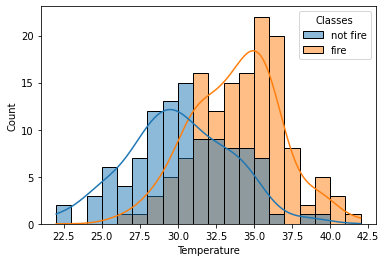

In [22]:
sns.histplot(data=df,x='Temperature',bins=20,hue='Classes',kde=True)

### Observation
- We can see the same trend in the case of Relative Humidity also.

<AxesSubplot:xlabel='Ws', ylabel='Count'>

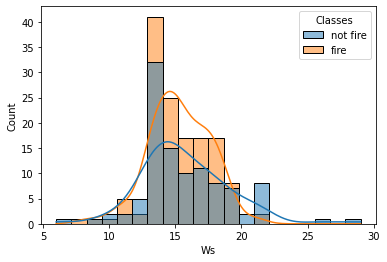

In [23]:
sns.histplot(data=df,x='Ws',bins=20,hue='Classes',kde=True)

### Observation
- Windspeed alone does not affect the occurance of rain.

<AxesSubplot:xlabel='Rain', ylabel='Count'>

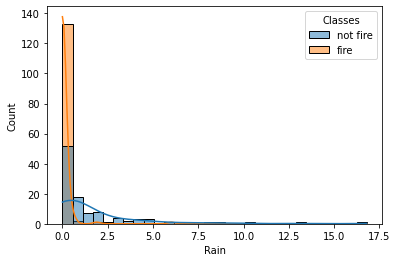

In [24]:
sns.histplot(data=df,x='Rain',bins=30,hue='Classes',kde=True)

<AxesSubplot:xlabel='FFMC', ylabel='Count'>

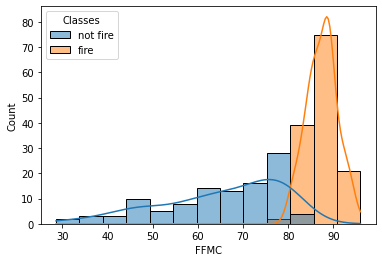

In [25]:
sns.histplot(data=df,x='FFMC',hue='Classes',kde=True)

### Observation
- When the FFMC is above 80 there are high chances of fire.

<AxesSubplot:xlabel='DMC', ylabel='Count'>

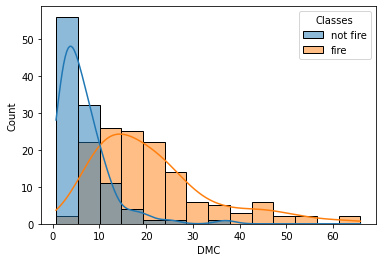

In [26]:
sns.histplot(data=df,x='DMC',hue='Classes',kde=True)

### Observation
- When the DMC is above 10-30 there are evidence of rain in the past.

<AxesSubplot:xlabel='DC', ylabel='Count'>

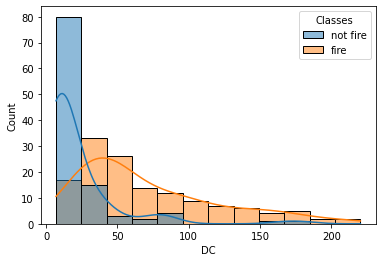

In [27]:
sns.histplot(data=df,x='DC',hue='Classes',kde=True)

### Observation
- When the DC is above 25 there are chances of rain.

<AxesSubplot:xlabel='ISI', ylabel='Count'>

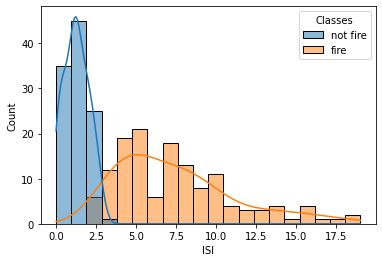

In [28]:
sns.histplot(data=df,x='ISI',bins=20,hue='Classes',kde=True)

### Observation
- Its very evident that when the ISI is above 2.5 fire occurs.

<AxesSubplot:xlabel='BUI', ylabel='Count'>

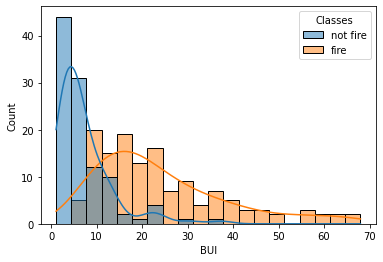

In [29]:
sns.histplot(data=df,x='BUI',bins=20,hue='Classes',kde=True)

### observation
- There are high chances of forest fire when BUI is greater than 10.

<AxesSubplot:xlabel='FWI', ylabel='Count'>

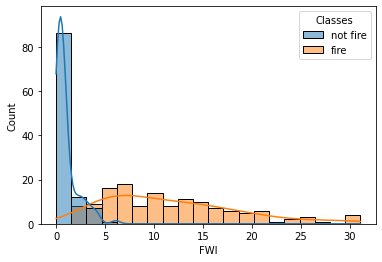

In [30]:
sns.histplot(data=df,x='FWI',bins=20,hue='Classes',kde=True)

### Observation
- **Fire Weather Index (FWI) Index** which ranges between *1 to 31.1*, 
    here 0-3 has lower chance of Forest fires and **3-25 FWI** has higher chance of forest fires. 

In [39]:
##Encoding Class feature
df['Classes']= np.where(df['Classes']== 'not fire',0,1)
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

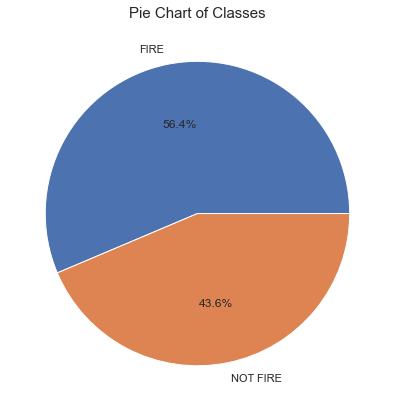

In [42]:
percentage=df['Classes'].value_counts(normalize=True)*100
classeslabels = ["FIRE", "NOT FIRE"]
plt.figure(figsize =(12, 7))
plt.pie(percentage,labels = classeslabels,autopct='%1.1f%%')  
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show()

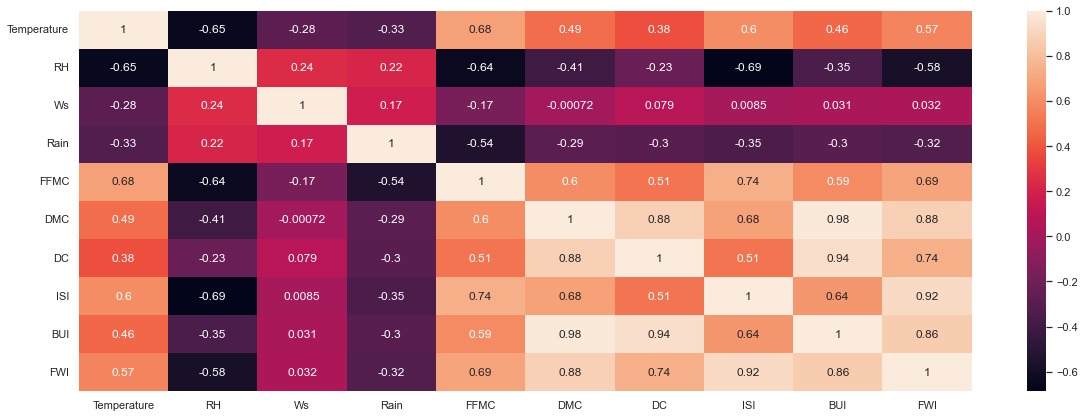

In [33]:
plt.figure(figsize=(20,7))
sns.set(font_scale=1)
sns.heatmap(df.drop(['Classes','day','month','year'],axis=1).corr(),annot=True)
plt.show()

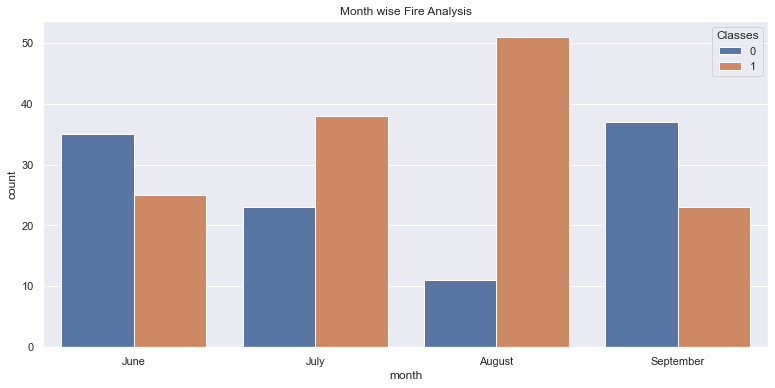

In [52]:
plt.subplots(figsize=(13,6))
plt.title('Month wise Fire Analysis')
sns.countplot(x=df['month'],hue=df['Classes'])
plt.xticks(np.arange(4), ['June','July', 'August', 'September']);

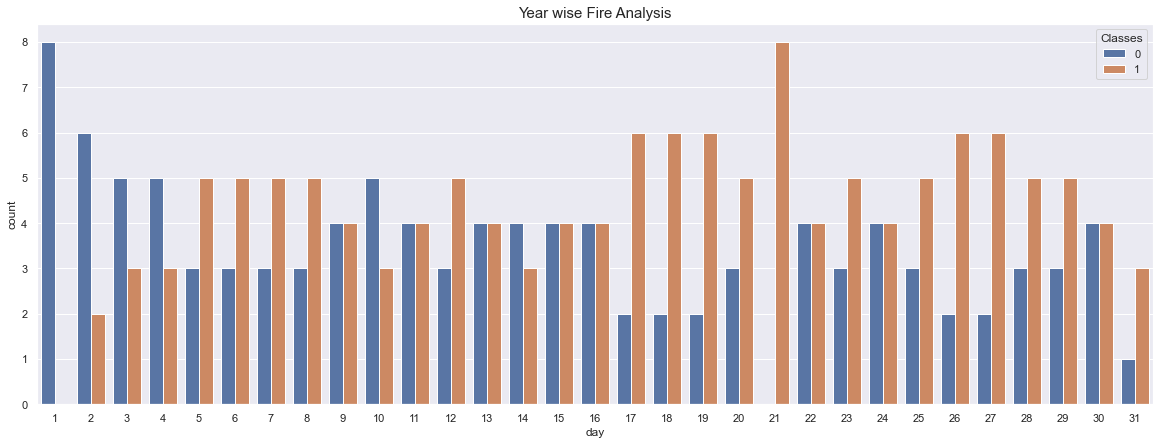

In [60]:
plt.subplots(figsize=(20,7))
plt.title('Year wise Fire Analysis',fontsize=15)
sns.countplot(data=df,x='day',hue='Classes');